# Aim :
Predictive maintanence
Predictive maintanence is the maintanence of machines at a predicted future time before the machine failure. This allows scheduled maintanence of the machines, reducing the unplanned downtime costs.

In this notebook, we will build a deployable end-to-end classification model to predict whether a machine failure will occur or not. We will train state-of-the-art and compare their performances.

Data
We will use a simulated dataset taken from Matzka (2020). It consists of 10,000 data points stored as rows with features like product type, air temperature, process temperature, rotational speed, torque wear, machine failure. The machine failures are grouped into 5 subcategories. For simplicity, we will predict the machine failure feature. A concise summary of the data, pair plots, and the distribution of the target variable are given below.

In [48]:
# importing useful library

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import dtale
from sklearn.linear_model import LogisticRegression
from sklearn import tree
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
import warnings
warnings.filterwarnings("ignore")
import os
import pandas as pd
from sklearn.model_selection import train_test_split
import numpy as np
import matplotlib.pyplot as plt
import random
from sklearn.linear_model import SGDClassifier
from sklearn.pipeline import make_pipeline
from sklearn import tree
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.naive_bayes import GaussianNB
from sklearn import metrics
from sklearn.ensemble import RandomForestClassifier
import re
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, plot_confusion_matrix
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix
from sklearn import metrics
import xgboost as xgb
regex = re.compile(r"\[|\]|<", re.IGNORECASE)
from sklearn.metrics import confusion_matrix,accuracy_score

# Now we load dataset

In [3]:
df = pd.read_csv('D:ml/ai4i2020.csv')


In [4]:
df.head(5)

,UDI,Product ID,Type,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Machine failure,TWF,HDF,PWF,OSF,RNF
0,1,M14860,M,298.1,308.6,1551,42.8,0,0,0,0,0,0,0
1,2,L47181,L,298.2,308.7,1408,46.3,3,0,0,0,0,0,0
2,3,L47182,L,298.1,308.5,1498,49.4,5,0,0,0,0,0,0
3,4,L47183,L,298.2,308.6,1433,39.5,7,0,0,0,0,0,0
4,5,L47184,L,298.2,308.7,1408,40.0,9,0,0,0,0,0,0


In [5]:
df.tail(5)

,UDI,Product ID,Type,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Machine failure,TWF,HDF,PWF,OSF,RNF
9995,9996,M24855,M,298.8,308.4,1604,29.5,14,0,0,0,0,0,0
9996,9997,H39410,H,298.9,308.4,1632,31.8,17,0,0,0,0,0,0
9997,9998,M24857,M,299.0,308.6,1645,33.4,22,0,0,0,0,0,0
9998,9999,H39412,H,299.0,308.7,1408,48.5,25,0,0,0,0,0,0
9999,10000,M24859,M,299.0,308.7,1500,40.2,30,0,0,0,0,0,0


Here we check is there any null values or not

In [6]:

df.isnull().sum()

UDI                        0
Product ID                 0
Type                       0
Air temperature [K]        0
Process temperature [K]    0
Rotational speed [rpm]     0
Torque [Nm]                0
Tool wear [min]            0
Machine failure            0
TWF                        0
HDF                        0
PWF                        0
OSF                        0
RNF                        0
dtype: int64

All Columns present in dataset

In [7]:
df.columns

Index(['UDI', 'Product ID', 'Type', 'Air temperature [K]',
       'Process temperature [K]', 'Rotational speed [rpm]', 'Torque [Nm]',
       'Tool wear [min]', 'Machine failure', 'TWF', 'HDF', 'PWF', 'OSF',
       'RNF'],
      dtype='object')

Correlation between columns present in dataset

In [127]:
df.corr()

,UDI,Product ID,Type,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Machine failure,TWF,HDF,PWF,OSF,RNF
UDI,1.000000,0.463158,0.005529,0.117428,0.324428,-0.006615,0.003207,-0.010702,-0.022892,0.009154,-0.022215,-0.023557,-0.000990,-0.005954
Product ID,0.463158,1.000000,0.866083,0.067602,0.160825,-0.006476,0.005000,-0.011603,-0.016975,0.003112,-0.011577,-0.001518,-0.024276,-0.020691
Type,0.005529,0.866083,1.000000,0.017599,0.013444,-0.002693,0.004011,-0.003930,-0.005152,-0.005349,0.000108,0.012121,-0.021211,-0.022147
Air temperature [K],0.117428,0.067602,0.017599,1.000000,0.876107,0.022670,-0.013778,0.013853,0.082556,0.009955,0.137831,0.003470,0.001988,0.017688
Process temperature [K],0.324428,0.160825,0.013444,0.876107,1.000000,0.019277,-0.014061,0.013488,0.035946,0.007315,0.056933,-0.003355,0.004554,0.022279
Rotational speed [rpm],-0.006615,-0.006476,-0.002693,0.022670,0.019277,1.000000,-0.875027,0.000223,-0.044188,0.010389,-0.121241,0.123018,-0.104575,-0.013088
Torque [Nm],0.003207,0.005000,0.004011,-0.013778,-0.014061,-0.875027,1.000000,-0.003093,0.191321,-0.014662,0.142610,0.083781,0.183465,0.016136
Tool wear [min],-0.010702,-0.011603,-0.003930,0.013853,0.013488,0.000223,-0.003093,1.000000,0.105448,0.115792,-0.001287,-0.009334,0.155894,0.011326
Machine failure,-0.022892,-0.016975,-0.005152,0.082556,0.035946,-0.044188,0.191321,0.105448,1.000000,0.362904,0.575800,0.522812,0.531083,0.004516
TWF,0.009154,0.003112,-0.005349,0.009955,0.007315,0.010389,-0.014662,0.115792,0.362904,1.000000,-0.007332,0.008577,0.038243,0.030970


In [9]:
df.describe()

,UDI,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Machine failure,TWF,HDF,PWF,OSF,RNF
count,10000.00000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000
mean,5000.50000,300.004930,310.005560,1538.776100,39.986910,107.951000,0.033900,0.004600,0.011500,0.009500,0.009800,0.00190
std,2886.89568,2.000259,1.483734,179.284096,9.968934,63.654147,0.180981,0.067671,0.106625,0.097009,0.098514,0.04355
min,1.00000,295.300000,305.700000,1168.000000,3.800000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000
25%,2500.75000,298.300000,308.800000,1423.000000,33.200000,53.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000
50%,5000.50000,300.100000,310.100000,1503.000000,40.100000,108.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000
75%,7500.25000,301.500000,311.100000,1612.000000,46.800000,162.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000
max,10000.00000,304.500000,313.800000,2886.000000,76.600000,253.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.00000


We visualize data

<AxesSubplot:>

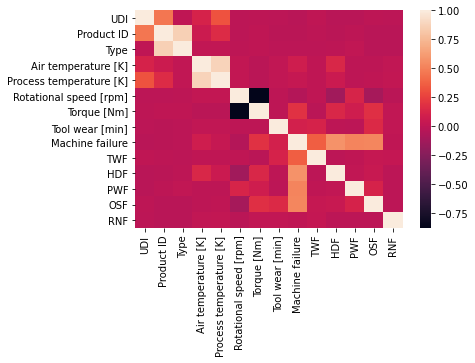

In [98]:
df.corr()
sns.heatmap(df.corr())


Pie plots for some important columns

<AxesSubplot:ylabel='Machine failure'>

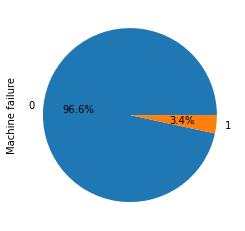

In [99]:
df['Machine failure'].value_counts().plot(kind='pie',autopct='%1.1f%%')


<AxesSubplot:ylabel='PWF'>

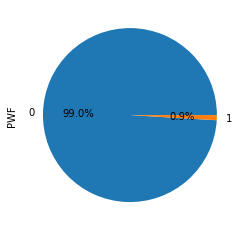

In [100]:
df['PWF'].value_counts().plot(kind='pie',autopct='%1.1f%%')


<AxesSubplot:ylabel='TWF'>

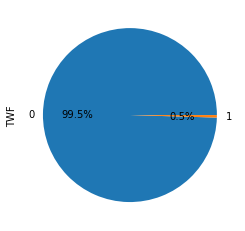

In [101]:
df['TWF'].value_counts().plot(kind='pie',autopct='%1.1f%%')

<AxesSubplot:ylabel='HDF'>

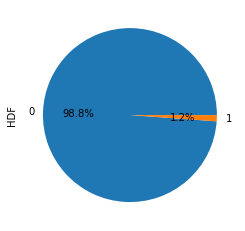

In [102]:
df['HDF'].value_counts().plot(kind='pie',autopct='%1.1f%%')

<AxesSubplot:ylabel='OSF'>

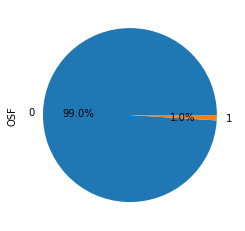

In [103]:
df['OSF'].value_counts().plot(kind='pie',autopct='%1.1f%%')

<AxesSubplot:ylabel='RNF'>

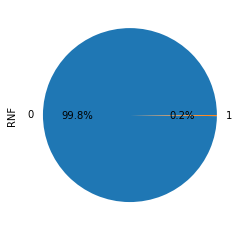

In [104]:
df['RNF'].value_counts().plot(kind='pie',autopct='%1.1f%%')

Bar plot for to check counts

<AxesSubplot:xlabel='Machine failure', ylabel='count'>

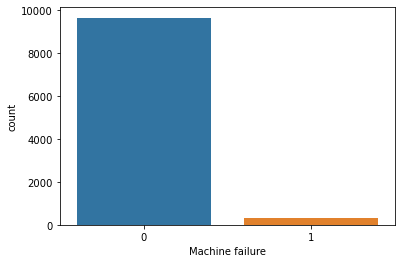

In [105]:
sns.countplot(df['Machine failure'])

<AxesSubplot:xlabel='TWF', ylabel='count'>

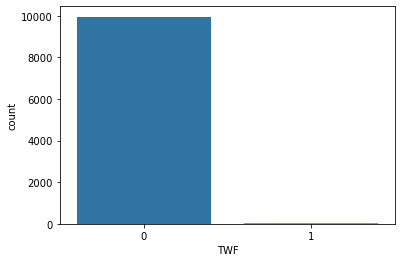

In [106]:
sns.countplot(df['TWF'])

<AxesSubplot:xlabel='Machine failure', ylabel='Density'>

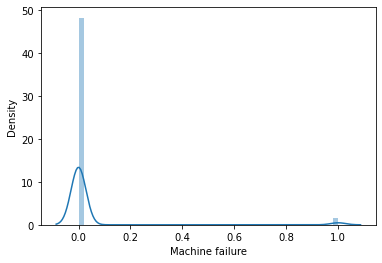

In [107]:
sns.distplot(df['Machine failure'])



<AxesSubplot:xlabel='TWF', ylabel='Density'>

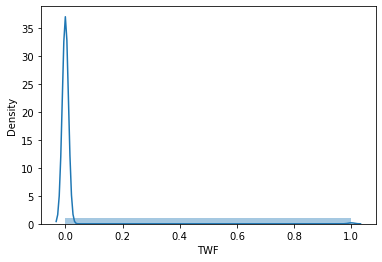

In [108]:
sns.distplot(df['TWF'],bins=1)

In [109]:
kk = df.drop('Product ID',axis='columns')

In [23]:
df2=df.drop(['TWF', 'HDF', 'PWF', 'OSF', 'RNF'],axis=1)

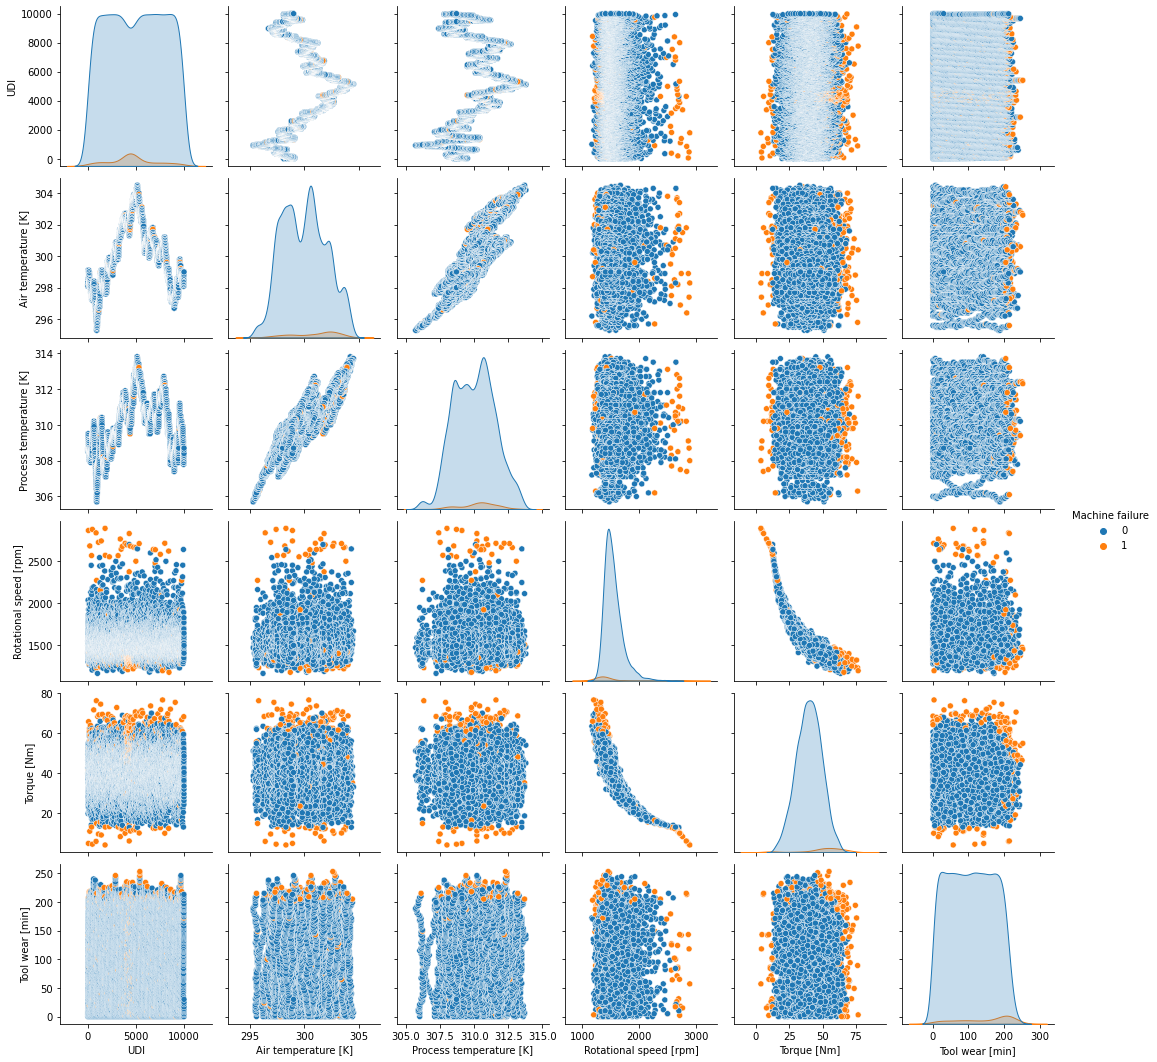

In [129]:
sns.pairplot(df2,hue='Machine failure')

In [25]:
df2[df2['Machine failure']==1][['Type']].apply(pd.value_counts)

,Type
L,235
M,83
H,21


From above we can say that L more towards machine failure

In [26]:
k= df2[df2['Machine failure']==1][['Air temperature [K]']].apply(pd.value_counts)

In [27]:
k


,Air temperature [K]
302.0,13
302.6,13
302.4,13
303.4,13
302.3,11
...,...
296.4,1
296.6,1
296.8,1
299.9,1


It mean that air temp 302,302.6,302.4 contubute more towards the machine failure

In [28]:

df2[df2['Machine failure']==1][['Torque [Nm]']].apply(pd.value_counts)

,Torque [Nm]
62.4,5
45.1,4
61.0,4
56.8,4
68.2,4
...,...
62.9,1
30.4,1
19.8,1
4.6,1


For torque  62.4,45.1,61 contubute more to wards the failure

In [30]:
df2[df2['Machine failure']==1][['Tool wear [min]']].apply(pd.value_counts
                                                         )

,Tool wear [min]
207,9
208,8
203,7
218,6
215,6
...,...
84,1
81,1
80,1
79,1


For tool wear 207,208,203,215  contrubute to wards the machine failure

# Data Preprocesssing

In [32]:
def LABEL_ENCODING(c1):
    from sklearn import preprocessing
    # label_encoder object knows how to understand word labels.
    label_encoder = preprocessing.LabelEncoder()
 
    # Encode labels in column 'species'.
    df[c1]= label_encoder.fit_transform(df[c1])
 
    df[c1].unique()
    return df

In [33]:
LABEL_ENCODING('Product ID')

,UDI,Product ID,Type,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Machine failure,TWF,HDF,PWF,OSF,RNF
0,1,7003,M,298.1,308.6,1551,42.8,0,0,0,0,0,0,0
1,2,1003,L,298.2,308.7,1408,46.3,3,0,0,0,0,0,0
2,3,1004,L,298.1,308.5,1498,49.4,5,0,0,0,0,0,0
3,4,1005,L,298.2,308.6,1433,39.5,7,0,0,0,0,0,0
4,5,1006,L,298.2,308.7,1408,40.0,9,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,9996,9997,M,298.8,308.4,1604,29.5,14,0,0,0,0,0,0
9996,9997,1001,H,298.9,308.4,1632,31.8,17,0,0,0,0,0,0
9997,9998,9998,M,299.0,308.6,1645,33.4,22,0,0,0,0,0,0
9998,9999,1002,H,299.0,308.7,1408,48.5,25,0,0,0,0,0,0


In [34]:
LABEL_ENCODING('Type')

,UDI,Product ID,Type,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Machine failure,TWF,HDF,PWF,OSF,RNF
0,1,7003,2,298.1,308.6,1551,42.8,0,0,0,0,0,0,0
1,2,1003,1,298.2,308.7,1408,46.3,3,0,0,0,0,0,0
2,3,1004,1,298.1,308.5,1498,49.4,5,0,0,0,0,0,0
3,4,1005,1,298.2,308.6,1433,39.5,7,0,0,0,0,0,0
4,5,1006,1,298.2,308.7,1408,40.0,9,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,9996,9997,2,298.8,308.4,1604,29.5,14,0,0,0,0,0,0
9996,9997,1001,0,298.9,308.4,1632,31.8,17,0,0,0,0,0,0
9997,9998,9998,2,299.0,308.6,1645,33.4,22,0,0,0,0,0,0
9998,9999,1002,0,299.0,308.7,1408,48.5,25,0,0,0,0,0,0


Splliting dependant and independant variables

In [35]:
X = df.drop('Machine failure',axis=1)
Y = df['Machine failure']

In [36]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2)

In [37]:
print(X_train.shape,Y_train.shape)

(8000, 13) (8000,)


In [38]:
print(X_test.shape,Y_test.shape)

(2000, 13) (2000,)


Modelling


1.Logistic Regression

In [153]:
kkk = LogisticRegression()
kkk.fit(X_train,Y_train)

LogisticRegression()

In [154]:
prd = kkk.predict(X_test)
accuracy_score(Y_test,prd)

0.8988095238095238

In [155]:
kkk.fit(X_train,Y_train) 
y_pred = kkk.predict(X_test)
from sklearn import metrics
print(" model accuracy(in %):", metrics.accuracy_score(Y_test, y_pred)*100)
print(classification_report(Y_test,y_pred))

 model accuracy(in %): 89.88095238095238
              precision    recall  f1-score   support

           0       0.89      0.94      0.92        99
           1       0.91      0.84      0.87        69

    accuracy                           0.90       168
   macro avg       0.90      0.89      0.89       168
weighted avg       0.90      0.90      0.90       168



In [156]:
confusion_matrix(Y_test,y_pred)

array([[93,  6],
       [11, 58]], dtype=int64)

In [157]:
kkk.score(X_test,Y_test)

0.8988095238095238

In [158]:
kkk.score(X_train,Y_train)

0.8614008941877794

2. Random Forest

In [146]:
clf = RandomForestClassifier(max_depth=2)
clf = clf.fit(X_train,Y_train)

clf.fit(X_train,Y_train)

RandomForestClassifier(max_depth=2)

In [150]:
clf.fit(X_train,Y_train) 
y_pred = clf.predict(X_test)
from sklearn import metrics
print(" model accuracy(in %):", metrics.accuracy_score(Y_test, y_pred)*100)
print(classification_report(Y_test,y_pred))

 model accuracy(in %): 91.66666666666666
              precision    recall  f1-score   support

           0       0.89      0.98      0.93        99
           1       0.97      0.83      0.89        69

    accuracy                           0.92       168
   macro avg       0.93      0.90      0.91       168
weighted avg       0.92      0.92      0.92       168



In [151]:
confusion_matrix(Y_test,y_pred)

array([[97,  2],
       [12, 57]], dtype=int64)

In [152]:
pred = clf.predict(X_test)
accuracy_score(Y_test,pred)

0.9166666666666666

3.Gaussian Navie Bayes

In [137]:
gnb = GaussianNB()
gnb.fit(X_train,Y_train) 
y_pred = gnb.predict(X_test)
from sklearn import metrics
print("Gaussian Naive Bayes model accuracy(in %):", metrics.accuracy_score(Y_test, y_pred)*100)
print(classification_report(Y_test,y_pred))

Gaussian Naive Bayes model accuracy(in %): 98.21428571428571
              precision    recall  f1-score   support

           0       0.98      0.99      0.98        99
           1       0.99      0.97      0.98        69

    accuracy                           0.98       168
   macro avg       0.98      0.98      0.98       168
weighted avg       0.98      0.98      0.98       168



In [138]:
confusion_matrix(Y_test,y_pred)

array([[98,  1],
       [ 2, 67]], dtype=int64)

In [142]:
accuracy_score(Y_test,y_pred)

0.9821428571428571

In [143]:
gnb.score(X_train,Y_train)

0.9880774962742176

In [144]:
gnb.score(X_test,Y_test)

0.9821428571428571

In [161]:
nk = df['Machine failure'].value_counts()

In [163]:
# By seeing scores and value counts its seems that model is getting overfitting
print(nk)

0    9661
1     339
Name: Machine failure, dtype: int64


will try to solve overfitting issue

In [58]:
k = df[df['Machine failure']>= 1]

In [59]:
k1 = df[df['Machine failure']== 0]

In [60]:
len(k)


339

In [61]:
len(k1)

9661

over sampling split

In [63]:
k1 = df.iloc[:9661]

In [64]:
k3 = df.sample(n=500)

In [65]:
k3

,UDI,Product ID,Type,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Machine failure,TWF,HDF,PWF,OSF,RNF
973,974,1590,1,295.9,306.6,1679,30.4,117,0,0,0,0,0,0
8426,8427,6076,1,299.1,310.5,1628,35.9,174,0,0,0,0,0,0
3595,3596,3165,1,301.6,310.4,1517,41.1,167,0,0,0,0,0,0
7807,7808,9356,2,300.0,311.5,1451,49.0,115,0,0,0,0,0,0
1356,1357,1806,1,298.6,309.9,1593,37.4,47,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5799,5800,4484,1,301.5,310.8,1593,34.5,162,0,0,0,0,0,0
9318,9319,6620,1,298.5,309.4,1364,44.5,162,0,0,0,0,0,0
8296,8297,6005,1,298.9,310.3,1436,39.0,32,0,0,0,0,0,0
2284,2285,2360,1,299.2,308.5,1378,53.4,100,0,0,0,0,0,0


In [66]:
final = pd.concat([k,k3],axis=0)

In [67]:
final

,UDI,Product ID,Type,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Machine failure,TWF,HDF,PWF,OSF,RNF
50,51,1026,1,298.9,309.1,2861,4.6,143,1,0,0,1,0,0
69,70,1039,1,298.9,309.0,1410,65.7,191,1,0,0,1,1,0
77,78,1046,1,298.8,308.9,1455,41.3,208,1,1,0,0,0,0
160,161,1097,1,298.4,308.2,1282,60.7,216,1,0,0,0,1,0
161,162,1098,1,298.3,308.1,1412,52.3,218,1,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5799,5800,4484,1,301.5,310.8,1593,34.5,162,0,0,0,0,0,0
9318,9319,6620,1,298.5,309.4,1364,44.5,162,0,0,0,0,0,0
8296,8297,6005,1,298.9,310.3,1436,39.0,32,0,0,0,0,0,0
2284,2285,2360,1,299.2,308.5,1378,53.4,100,0,0,0,0,0,0


In [68]:
final['Machine failure'].value_counts()

0    481
1    358
Name: Machine failure, dtype: int64

we take approximate balence  amount of samples of machine failure

<AxesSubplot:xlabel='Machine failure', ylabel='count'>

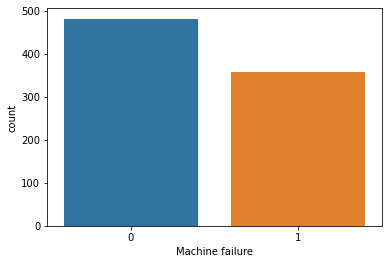

In [110]:
sns.countplot(final['Machine failure'])

<AxesSubplot:xlabel='Machine failure', ylabel='Density'>

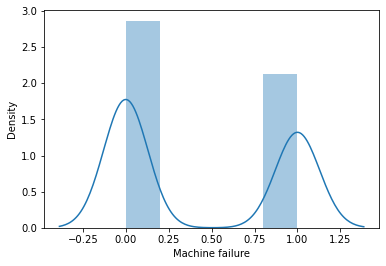

In [111]:
sns.distplot(final['Machine failure'])

<AxesSubplot:ylabel='Machine failure'>

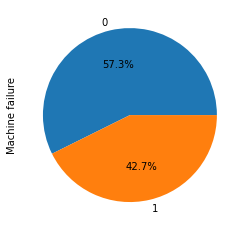

In [112]:
final['Machine failure'].value_counts().plot(kind='pie',autopct='%1.1f%%')


In [69]:
final.isnull().sum()

UDI                        0
Product ID                 0
Type                       0
Air temperature [K]        0
Process temperature [K]    0
Rotational speed [rpm]     0
Torque [Nm]                0
Tool wear [min]            0
Machine failure            0
TWF                        0
HDF                        0
PWF                        0
OSF                        0
RNF                        0
dtype: int64

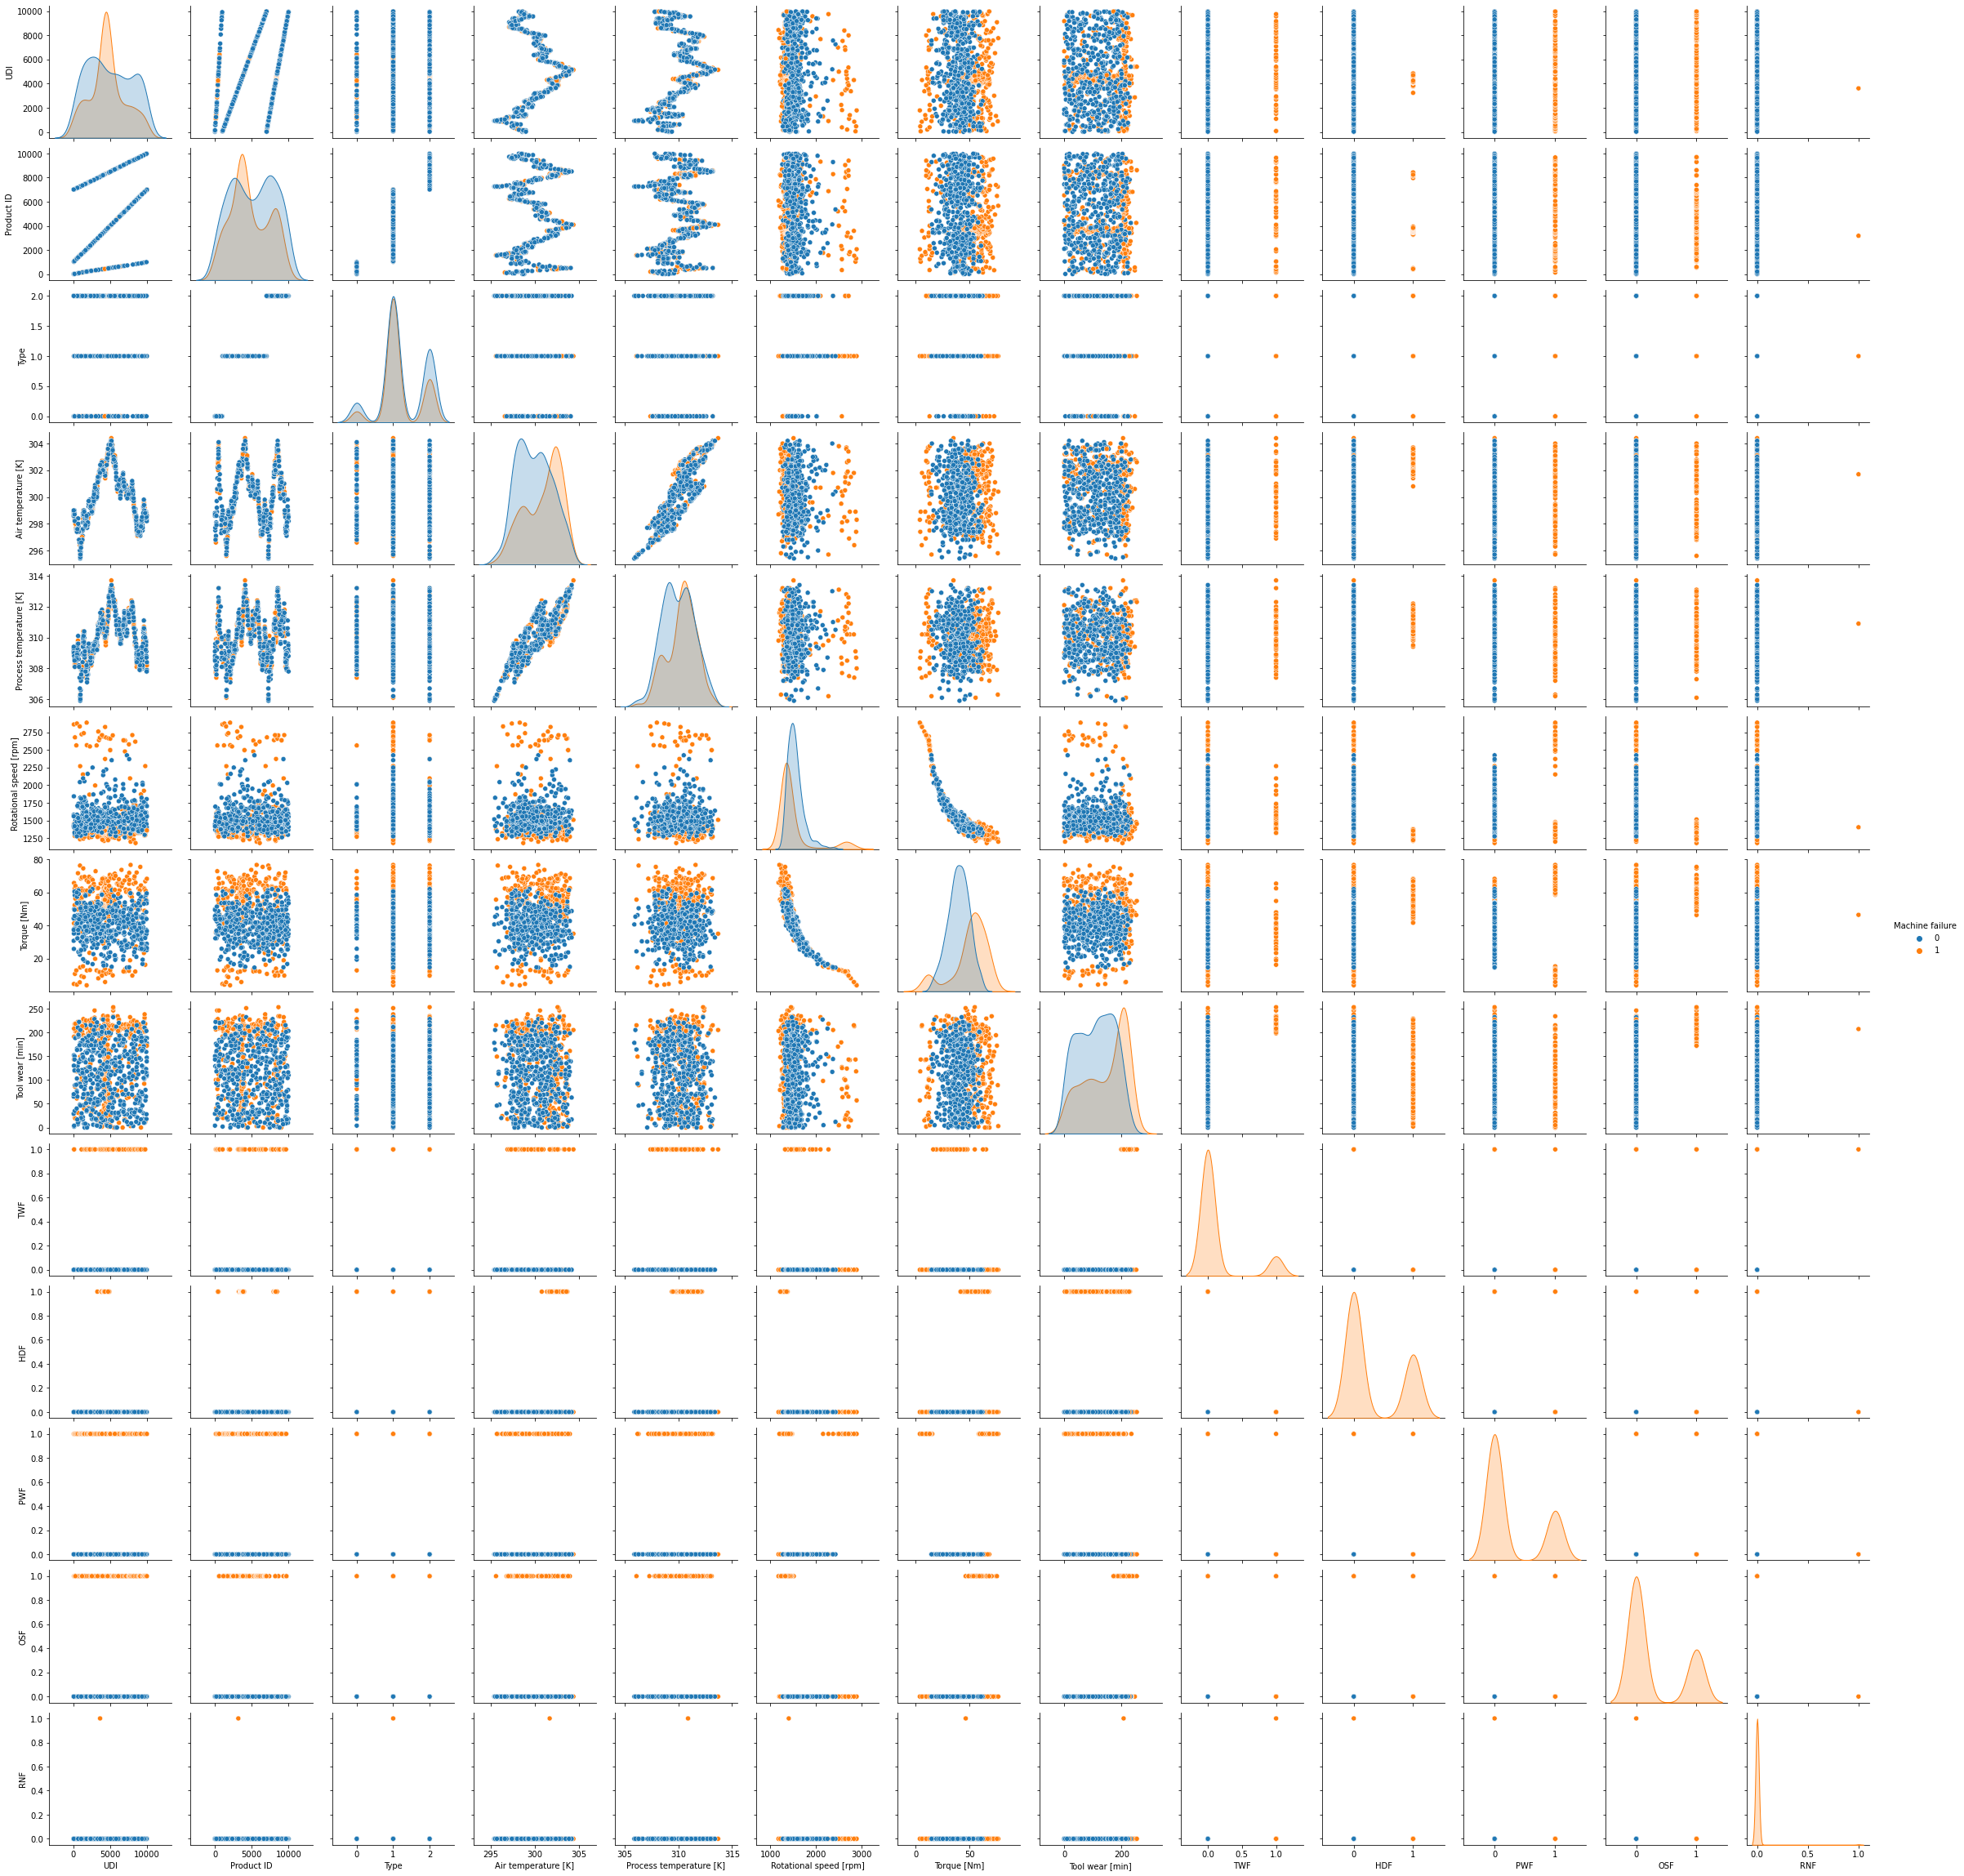

In [115]:
sns.pairplot(final,hue='Machine failure')

<AxesSubplot:>

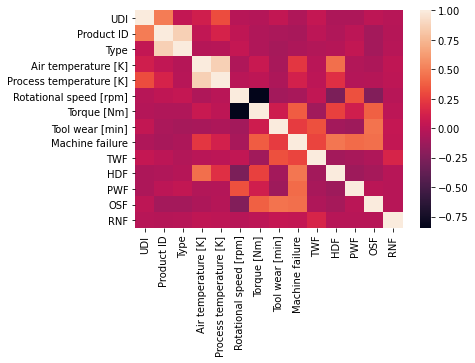

In [113]:
final.corr()
sns.heatmap(final.corr())


In [70]:
len(final)

839

In [71]:
X=final.drop('Machine failure',axis=1)
y=final['Machine failure']

In [72]:
X_train, X_test, Y_train, Y_test = train_test_split(X, y, test_size=0.2)

In [73]:
print(X_train.shape,Y_train.shape)

(671, 13) (671,)


In [74]:
print(X_test.shape,Y_test.shape)

(168, 13) (168,)


In [86]:
clf = RandomForestClassifier(max_depth=2)
clf = clf.fit(X_train,Y_train)



In [87]:
prediction=clf.predict(X_test)

In [88]:
print(confusion_matrix(Y_test,prediction))
print("Random Forest model accuracy(in %):", metrics.accuracy_score(Y_test, prediction)*100)
print(classification_report(Y_test,prediction))

[[99  0]
 [13 56]]
Random Forest model accuracy(in %): 92.26190476190477
              precision    recall  f1-score   support

           0       0.88      1.00      0.94        99
           1       1.00      0.81      0.90        69

    accuracy                           0.92       168
   macro avg       0.94      0.91      0.92       168
weighted avg       0.93      0.92      0.92       168



In [89]:
confusion_matrix(Y_test,y_pred)

array([[98,  1],
       [ 2, 67]], dtype=int64)

In [90]:
accuracy_score(Y_test,y_pred)

0.9821428571428571

In [91]:
clf.score(X_test,Y_test)

0.9226190476190477

In [79]:
gnb = GaussianNB()
gnb.fit(X_train,Y_train) 
y_pred = gnb.predict(X_test)
from sklearn import metrics
print("Gaussian Naive Bayes model accuracy(in %):", metrics.accuracy_score(Y_test, y_pred)*100)
print(classification_report(Y_test,y_pred))

Gaussian Naive Bayes model accuracy(in %): 98.21428571428571
              precision    recall  f1-score   support

           0       0.98      0.99      0.98        99
           1       0.99      0.97      0.98        69

    accuracy                           0.98       168
   macro avg       0.98      0.98      0.98       168
weighted avg       0.98      0.98      0.98       168



In [80]:
from sklearn.metrics import confusion_matrix,accuracy_score

In [81]:
confusion_matrix(Y_test,y_pred)

array([[98,  1],
       [ 2, 67]], dtype=int64)

In [82]:
y_pred

array([0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0,
       0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1,
       1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1,
       0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1,
       0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1,
       0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1], dtype=int64)

In [83]:
accuracy_score(Y_test,y_pred)

0.9821428571428571

In [92]:
gnb.score(X_test,Y_test)

0.9821428571428571

In [95]:
ln = LogisticRegression()

ln.fit(X_train,Y_train) 
y_pred = ln.predict(X_test)
from sklearn import metrics
print("Logistic model accuracy(in %):", metrics.accuracy_score(Y_test, y_pred)*100)
print(classification_report(Y_test,y_pred))

Logistic model accuracy(in %): 89.88095238095238
              precision    recall  f1-score   support

           0       0.89      0.94      0.92        99
           1       0.91      0.84      0.87        69

    accuracy                           0.90       168
   macro avg       0.90      0.89      0.89       168
weighted avg       0.90      0.90      0.90       168



In [96]:
confusion_matrix(Y_test,y_pred)

array([[93,  6],
       [11, 58]], dtype=int64)

In [97]:
accuracy_score(Y_test,y_pred)

0.8988095238095238

In [125]:
ln.score(X_test,Y_test)

0.8988095238095238

In [118]:
dtree = tree.DecisionTreeClassifier()

In [122]:
dtree.fit(X_train,Y_train)
y_pred = dtree.predict(X_test)
from sklearn import metrics
print("Dtree accuracy(in %):", metrics.accuracy_score(Y_test, y_pred)*100)
print(classification_report(Y_test,y_pred))

Dtree accuracy(in %): 96.42857142857143
              precision    recall  f1-score   support

           0       0.96      0.98      0.97        99
           1       0.97      0.94      0.96        69

    accuracy                           0.96       168
   macro avg       0.97      0.96      0.96       168
weighted avg       0.96      0.96      0.96       168



In [123]:
confusion_matrix(Y_test,y_pred)

array([[97,  2],
       [ 4, 65]], dtype=int64)

In [124]:
accuracy_score(Y_test,y_pred)

0.9642857142857143

In [126]:
ln.score(X_test,Y_test)

0.8988095238095238

We always try to reduce false positive and false negative count in model,as per our dataset our main aim is to reduce false negatives and also false positives so we get an machine falied or not correctly.

Our Gaussian NB model gives best accuracy and matrix values too us. 
We choose that and dump it .
Thanks 